In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from bayes_opt import BayesianOptimization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 解决中文乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

In [2]:
data=pd.read_csv('./use.csv')
train_data,test_data=train_test_split(data,test_size=0.2, 
                                      random_state=1314
                                      )
feature=train_data.drop(['Sel','Unnamed: 0'],axis=1)
label=train_data['Sel']

In [3]:
kfold = KFold(n_splits = 5, random_state = 1314, shuffle = True)

In [4]:
def RFR_cv(n_estimators, min_samples_split, max_depth):
    val = cross_val_score(
        RandomForestRegressor(n_estimators=int(n_estimators),
            min_samples_split=int(min_samples_split),
            max_depth=int(max_depth),
            random_state=1314
        ),
        feature, label, scoring='r2', cv=kfold
    ).mean()
    return val

In [5]:
RFR_opt = BayesianOptimization(
        RFR_cv,
        {'n_estimators': (50, 1000),
        'min_samples_split': (2, 25),
        'max_depth': (2, 15)}
    )

In [6]:
RFR_opt.maximize(n_iter=50)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
| 1         | 0.2725    | 2.833     | 8.442     | 181.5     |
| 2         | 0.6808    | 12.68     | 6.266     | 139.2     |
| 3         | 0.5074    | 5.712     | 20.52     | 838.9     |
| 4         | 0.3969    | 3.724     | 13.86     | 264.1     |
| 5         | 0.5906    | 8.766     | 17.45     | 531.3     |
| 6         | 0.6752    | 11.38     | 6.62      | 138.3     |
| 7         | 0.706     | 14.62     | 2.572     | 107.3     |
| 8         | 0.6077    | 14.14     | 20.43     | 73.88     |
| 9         | 0.5611    | 7.478     | 20.8      | 593.1     |
| 10        | 0.5855    | 13.23     | 24.57     | 116.2     |
| 11        | 0.7033    | 14.96     | 4.987     | 478.7     |
| 12        | 0.4588    | 4.842     | 22.35     | 453.3     |
| 13        | 0.4874    | 4.34      | 2.633     | 497.2     |
| 14        | 0.7056    | 14.41     | 2.045     | 120.8     |
| 15    

In [4]:
model = RandomForestRegressor(n_estimators=1000,
                              max_depth=23,
                              max_features=45,
                              random_state=1314).fit(X=feature , y=label)
r2_score = cross_val_score(model, feature, label, cv=kfold, scoring='r2').mean()
rmse_score = pow(abs(cross_val_score(model, feature, label, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5)
print('r2:',r2_score)
print('rmse:',rmse_score)

r2: 0.7212082369961352
rmse: 11.356975265599788


In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
test_x = test_data.drop(['Sel','Unnamed: 0'],axis=1)
test_y = test_data['Sel']
print('r2:',r2_score(label,model.predict(feature)))
print('MAE:',pow(mean_squared_error(label,model.predict(feature)),0.5))
print('测试集得分为：', r2_score(test_y,model.predict(test_x)),pow(mean_squared_error(test_y,model.predict(test_x)),0.5))

r2: 0.9701851075927469
MAE: 3.770345093814743
测试集得分为： 0.8005210285929053 9.57310463410721


In [9]:
# 预测
Y1=model.predict(X=test_data.drop(['Sel','Unnamed: 0'],axis=1))
Y2=test_data['Sel']
d={'Y_pred':Y1,
   'Y_True':Y2
   }
pred_show=pd.DataFrame(d)

In [10]:
# 预测2
Y_1=model.predict(X=feature)
Y_2=label
d_1={'Y_pred':Y_1,
   'Y_True':Y_2
   }
pred_show_1=pd.DataFrame(d_1)

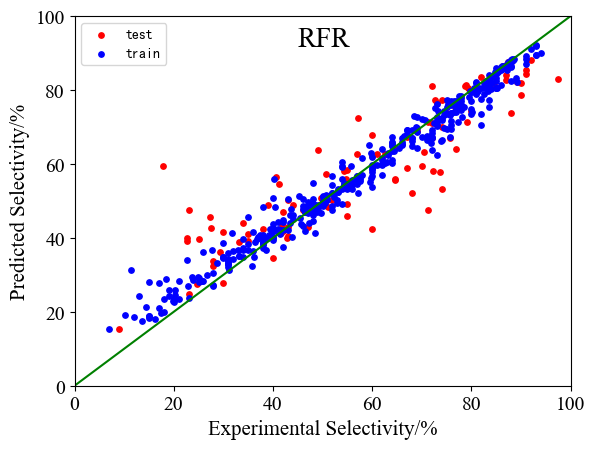

In [11]:
plt.scatter(pred_show.iloc[:,1],pred_show.iloc[:,0],color='r',s=15,label='test')
plt.scatter(pred_show_1.iloc[:,1],pred_show_1.iloc[:,0],color='b',s=15,label='train')
plt.xlim((0,100))
plt.xlabel('Experimental Selectivity/%',fontsize=15,font=Path('..\TimesNewRoman.ttf'))
plt.xticks(fontsize=14,fontname='Times New Roman')
plt.ylim((0,100))
plt.ylabel('Predicted Selectivity/%',fontsize=15,font=Path('..\TimesNewRoman.ttf'))
plt.yticks(fontsize=14,fontname='Times New Roman')
plt.plot([0,100],[0,100],color='g')
plt.text(45,92,'RFR',fontsize=20,font=Path('..\TimesNewRoman.ttf'))
plt.legend()
plt.show()